In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import warnings
import time
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re 

warnings.filterwarnings('ignore')

df = pd.read_csv('data.csv')
df.head(1)

,Unnamed: 0,Name,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,catagory,description,sub_catagory
0,0,Summer Squash Salad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy


In [4]:
l = ['Name','sub_catagory','catagory','description']
drop = []
columns = list(df.columns)
for col in columns:
    if col not in l:
        drop.append(col)
if drop!=[]:
    df = df.drop(drop,axis=1)


In [5]:
l = ['chicken','wings','meat','salmon','salmons','cob','cobs','kebab','kebabs','fish','snake','gosht','bacon','mutton','lamb','egg','eggs']
nv = ['chicken','meat']
vg_nv = []

for name,cat in zip(df.Name,df.catagory):
    n = name.split()
    f=0
    if cat in nv:
        vg_nv.append('non-veg')
    else: 
        for i in n:
            if i.lower() in l:
                f=1
        if f==1:
            vg_nv.append('non-veg')
        else:
            vg_nv.append('veg')
            
df['Veg_Non'] = vg_nv
df.head()

,Name,catagory,description,sub_catagory,Veg_Non
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg


veg        1646
non-veg     305
Name: Veg_Non, dtype: int64


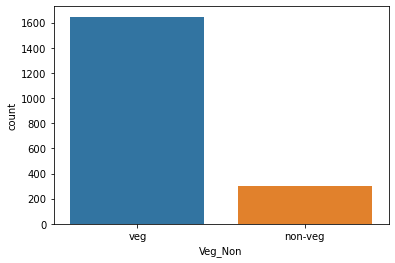

In [6]:
print(df.Veg_Non.value_counts())
sns.countplot(df.Veg_Non)
plt.savefig('vegnon.png')

In [7]:
review = []
for i in range(df.shape[0]):
    review.append(random.randint(1,10))
df['Review'] = review
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,4
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,9
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,8
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,4
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,8


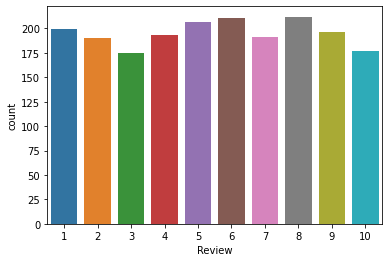

In [8]:
sns.countplot(df.Review)

In [10]:
class Nutrient:
    
    def __init__(self,df):
        self.df = df
        pass
    
    def Iron(self):
        url = 'https://www.redcrossblood.org/donate-blood/blood-donation-process/before-during-after/iron-blood-donation/iron-rich-foods.html'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'par-33'})
        l=[]
        iron = []
        for html in s:
            l = html.ul.text.split('\n')
            l = l[1:-1]
            iron = iron+l
        iron = ['red meat', 'poultry', 'eggs','egg', 'fruits', 'green' , 'fortified bread'] + iron
        return iron
    
    def Calcium(self):
        url = 'https://www.medicalnewstoday.com/articles/322585.php#non-dairy-sources-of-calcium'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        calcium = []
        for i in s[:-1]:
            calcium.append(i.text.split('.')[1].strip())
        calcium =['keer','yogurt', 'cheese', 'milk', 'salmon', 'leafy green','Cappuccino'] + calcium
        return calcium
    
    def Sodium(self):
        url = 'https://www.healthline.com/nutrition/foods-high-in-sodium#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        sodium = []
        for i in s[:-1]:
            sodium.append(i.a.text.split('.')[1].strip())
        sodium = ['salt', 'soy sauce', 'vegetables'] + sodium
        return sodium
    
    def Iodine(self):
        url = 'https://www.healthline.com/nutrition/iodine-rich-foods#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        iodine = []
        for i in s[:-1]:
            iodine.append(i.a.text.split('.')[1].strip())
        iodine = [ 'salt', 'seafood'] + iodine
        return iodine
    
    def Selenium(self):
        url = 'https://www.healthline.com/health/selenium-foods#cashews'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        selenium = []
        for i in s[2:]:
            selenium.append(i.a.text.split('.')[1].strip())
        selenium = ['banana','Organ meat', 'seafood', 'walnuts'] + selenium
        return selenium
    
    def Protien(self):
        url = 'https://www.healthline.com/nutrition/20-delicious-high-protein-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        protien = []
        for i in s[:-1]:
            protien.append(i.a.text.split('.')[1].strip())
        protien = protien + ['cookie','cookies','mutton','meat','gosht','Chicken','Wings','Meat','Salmon','Cob','Kebab','Fish','Snake','Gosht','Bacon','Mutton','Lamb']
        url = 'https://www.medicalnewstoday.com/articles/321522.php#high-protein-foods-for-weight-loss'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('p')
        for p in s:
            if p.strong:
                protien.append(p.strong.text.split('.')[1].strip())
        return protien
    
    def Carbohydrates(self): 
        url = 'https://www.healthline.com/nutrition/12-healthy-high-carb-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        carb = []
        for i in s[:-1]:
            carb.append(i.a.text.split('.')[1].strip())
        url = 'https://www.medicalnewstoday.com/articles/323110.php#dried-fruits'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        for i in s[:-1]:
            carb.append(i.text.split('.')[1].strip())
        url = 'https://www.tuasaude.com/en/high-carb-foods/'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('td')
        for i in range(3,len(s),3):
            carb.append(s[i].text.strip())
        carb = carb +['Poha','aloo','buttter','ghee','rice','biryani','pulao']
        return carb
    
    def Vitamin_c(self):
        Vitamin_C = ['margarita','Citrus fruit',' potatoes', 'broccoli', 'bell peppers', 'spinach','strawberries','tomatoes', 'Brussels sprouts']
        return Vitamin_C
    
    def Vitamin_A(self):
        return ['beef', 'liver', 'eggs','egg', 'shrimp', 'fish', 'fortified milk',' sweet potatoes', 'carrots', 'pumpkins', 'spinach',' mangoes']

    def Vitamin_D(self):
        return ['milk' ,'cereals',' fatty','fish']

    def Vitamin_E(self):
        return ['vegetables oils', 'leafy green', 'whole grains', 'nuts']

    def Vitamin_K(self):
        return ['Cabbage', 'eggs','egg',' milk', 'spinach', 'broccoli',' kale']
    
    def Chloride(self):
        return ['salt']

    def Potassium(self):
        return ['cake','meat', 'milk', 'fruits', 'vegetables', 'grains', 'legumes']
  
    def Chromium(self):
        return ['meat', 'poultry', 'fish', 'nuts', 'cheese']

    def Copper(self):
        return ['shellfish', 'nuts', 'seeds', 'beans',' prunes']

    def Fluoride(self):
        return ['fish', 'teas']
    
    def Manganese(self):
        return ['nuts', 'legumes', 'whole grains', 'tea','coffee','chai']

    def Zinc(self):
        return ['meat', 'shellfish', 'legumes', 'whole grains']

    def Fiber(self):
        return ['Salad','salad']

    def Phosphorus(self):
        return ['paneer','kebab']
    
    def apply(self):
        Nutritions = {'Phosphorus':self.Phosphorus(),'Fiber':self.Fiber(),
                  'Vitamin_c':self.Vitamin_c(),'Vitamin_A':self.Vitamin_A(),'Vitamin_D':self.Vitamin_D(),'Vitamin_E':self.Vitamin_E(),'Vitamin_K':self.Vitamin_K(),
                 'Calcium':self.Calcium(),'Chloride':self.Chloride(),'Potassium':self.Potassium(),'Sodium':self.Sodium(),
                  'Chromium':self.Chromium(),'Copper':self.Copper(),'Fluoride':self.Fluoride(),
                  'Iodine':self.Iodine(),'Iron':self.Iron(),'Manganese':self.Manganese(),'Selenium':self.Selenium(),'Zinc':self.Zinc(),'Protien':self.Protien(),'Carbohydrates':self.Carbohydrates()}

        
        nutrient = []
        tokens = []
        for i,j in zip(df.Name,df.description):
            N = [k.lower() for k in i.split()] 
            try:
                D = [k.lower() for k in j.split()]
            except:
                D = []
                
            D = N+D[2:]
            tokens.append(D)
                  

        for value in tokens:
            f=1
            for key,values in Nutritions.items():
                for i in [k.lower() for k in values]:
                    if i in value and f==1:
                        nutrient.append(key)
    
                        f=0
                    
            if f==1:
                nutrient.append(np.nan)
                f=0


                        

        self.df['Nutrient'] = nutrient

ob = Nutrient(df)
ob.apply()

print('missing values:',df.Nutrient.isnull().sum())


AttributeError: 'NoneType' object has no attribute 'text'